[View in Colaboratory](https://colab.research.google.com/github/alvarogutyerrez/alvarogutyerrez/blob/master/S04_aplicaciones.ipynb)

#Sesion 4: Aplicaciones



## (1) Demanda Computacional

Generar un loop que:

1. Simular una Muestra de *_n_* observaciones y 10 regresores. Estimar un modelo lineal (* ocupando sklearn*)  y recuperar el tiempo que demoró el proceso. Repetir la operación 100000000. Graficar demanda computacional contra el número de observaciones.





In [0]:
!wget https://www.dropbox.com/s/2ayo637xecc1sfs/tictoc.py 

In [0]:
from tictoc import tic,toc,toc2
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import pandas as pd 
import numpy as np

Lo primer será definir los parámetros del loop

In [0]:
np.random.seed(seed=777)
resultado_plus_row = []
n_col = 10 #Numero de columnas
n_row = 10 #Numero de Filas
n_row_final = 100000000 #Numero Maximo de Filas
n_row_delta = 10000 #Delta entre cada iteracion
n_row_limite =1000000 #Condicion de Salida del Loop

Cuerpo del loop

In [0]:
while n_row<n_row_final:
    Y = np.random.rand(n_row,1)     #Generando la variable explicada
    X = np.random.rand(n_row,n_col) #Generando el vector de regresores
    reg_lineal = LinearRegression() #Declarando el modelo
    tic()                           #Inicio del conteo del tiempo
    reg_lineal.fit(X, Y)            #Estimando el modelo
    toc_sklearn_linear_reg = toc2() #Registro final del tiempo ocupado
    a=[n_row,toc_sklearn_linear_reg]#Generamos lista que ocuparemos para hacer append
    resultado_plus_row.append(a)    #Append a la lista vacia del inicio
    #print(toc_sklearn_linear_reg)   #Imprimir en pantalla
    n_row=n_row +n_row_delta        #Numero de fila actual + delta de avance
    #print(n_row)                    #Imprimiendo en Pantalla
    if n_row>n_row_limite:          #Condicion de Salida
        break                       #Breakkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkkk

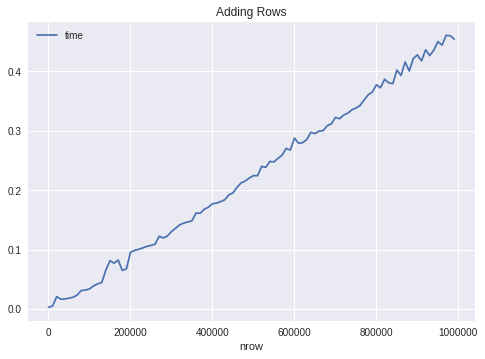

In [15]:
resultado_plus_row_df = pd.DataFrame(resultado_plus_row,columns = ['nrow', 'time'])
graph=resultado_plus_row_df.plot(x='nrow', y='time',kind='line',title='Adding Rows')    


# Obtención de Retornos 

### Función Shift

Esta función nos permitirá generar rezagos o leads de las variables 

In [0]:
!wget https://www.dropbox.com/s/nolez1g7nnvayf3/data_usd-clp.xlsx
!pip install xlrd  

Load Data

In [30]:
data=pd.read_excel("data_usd-clp.xlsx")
dolar_hoy     = data.iloc[:,0]
dolar_hoy.head(4)

2012-12-28    479.470
2012-12-31    476.404
2013-01-01    475.382
2013-01-02    474.360
Name: USDCLP Curncy, dtype: float64

Rezago de la Variable

In [31]:
dolar_lag1     = dolar.shift(1).copy(True)
dolar_lag1.head(4)

2012-12-28        NaN
2012-12-31    479.470
2013-01-01    476.404
2013-01-02    475.382
Name: USDCLP Curncy, dtype: float64

Calculando el delta entre ayer y hoy

In [32]:
delta = dolar_lag1 -dolar_hoy
delta.head(4)

2012-12-28      NaN
2012-12-31    3.066
2013-01-01    1.022
2013-01-02    1.022
Name: USDCLP Curncy, dtype: float64

Calculo del retorno

In [39]:
ret = delta/dolar_hoy
ret.head(10)

2012-12-28         NaN
2012-12-31    0.006436
2013-01-01    0.002150
2013-01-02    0.002154
2013-01-03    0.004107
2013-01-04   -0.001480
2013-01-07    0.003776
2013-01-08   -0.001927
2013-01-09    0.002760
2013-01-10    0.000361
Name: USDCLP Curncy, dtype: float64

## Calculo de Intervalos (bins)

In [50]:
tolerancia = 0.0015
bins=[-100000,-1*tolerancia,tolerancia,100000]
group_names=[-1,0,1]
clasificacion=pd.to_numeric(pd.cut(ret,bins,labels=group_names))     
clasificacion.head(10)


2012-12-28    NaN
2012-12-31    1.0
2013-01-01    1.0
2013-01-02    1.0
2013-01-03    1.0
2013-01-04    0.0
2013-01-07    1.0
2013-01-08   -1.0
2013-01-09    1.0
2013-01-10    0.0
Name: USDCLP Curncy, dtype: float64

#Trainning and Testing 


Training sample


In [57]:
corte='2014-03-13'
x_tr =data.iloc[:,0:-1].copy(True)
x_tr =x_tr[data.index>corte].copy(True)

y_tr =data.iloc[:,0].copy(True)
y_tr =y_tr[data.index>corte].copy(True)

x_tr.head(7)





,USDCLP Curncy,USSW1 Curncy,USSW10 Curncy,CHSWP1 ICCH Curncy,CHSWP10 Curncy,CCHIL1U5 CBIN Curncy,HGA Comdty,CL1 Comdty,VIX Index
2014-03-14,571.78,0.2790,2.7693,3.86,5.270,80.020,294.75,98.89,17.82
2014-03-17,570.45,0.2803,2.8075,3.85,5.250,79.675,295.25,98.08,15.64
2014-03-18,569.08,0.2790,2.7880,3.82,5.225,76.680,294.85,99.70,14.52
2014-03-19,572.05,0.2870,2.8910,3.80,5.190,78.335,298.15,100.37,15.12
2014-03-20,566.05,0.2880,2.8920,3.80,5.185,80.665,292.55,99.43,14.52
2014-03-21,565.55,0.2860,2.8588,3.78,5.210,82.175,294.95,99.46,15.00
2014-03-24,563.60,0.2888,2.8460,3.76,5.215,80.025,294.65,99.60,15.09


In [0]:
x_tst =data.iloc[:,0:-1].copy(True)
x_tst =x_tst[data.index<=corte].copy(True)

y_tst =data.iloc[:,0].copy(True)
y_tst =y_tst[data.index<=corte].copy(True)

training models

In [67]:
    reg_lineal = LinearRegression()
    reg_lineal.fit(x_tr, y_tr)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Testing 

In [76]:
pred_training=reg_lineal.predict(x_tst)  

pred_training = pd.DataFrame(data = pred_training  ,   index=y_tst.index , columns = {'Prediction_testing'})
pred_training.head(10)


,Prediction_testing
2012-12-28,479.470
2012-12-31,476.404
2013-01-01,475.382
2013-01-02,474.360
2013-01-03,472.420
2013-01-04,473.120
2013-01-07,471.340
2013-01-08,472.250
2013-01-09,470.950
2013-01-10,470.780


In [82]:
MAE=mean_squared_error(y_tst,pred_training)
MAE

6.923944859539852e-27